# Machine learning

This week we will be learning how to develop and use machine learning models. We only have a week so the aim is to briefly **review the basics** of machine learning and provide a **hands-on demo** with a geospatial dataset. Students who are interested are encouraged to pursue some of great online resources that are now available to learn more about this extensive (and rapidly growing) field.    

## What is machine learning?

* The goal of machine learning is use **input data** to make **useful predictions** on **never-before-seen data**


* Machine learning is **part** of artificial intelligence, but not the only part

```{image} images/ml_schematic.jpg
:width: 600px
:align: center
```

## Input data

* Machine learning starts with a **labelled dataset**


* A **label** (or target variable) is the thing we're predicting (e.g. `y` variable in linear regression)


* For example, house price, river discharge, land cover etc.

* It's tough to collect a good collection of data (time-consuming, expensive) 


* These datasets are therefore **extremely valuable**

```{image} images/captcha.jpeg
:width: 300px
:align: center
```

## Features

* An input **variable** (e.g. the `x` variable in linear regression)


* A simple dataset might use a **one or two features** while a more complex dataset could have **thousands of features**


* In our river discharge example - features could include precipitation, snow depth, soil moisture


## Algorithms

* There are many (e.g. naive bayes, decision trees, neural network etc.)


* Performance of algorithm dependent on type of problem


* Just remember: **garage in, garbage out**

```{image} images/ml_types.jpg
:width: 600px
:align: center
```

## Supervised learning

* Training data is already **labeled** and we teach the machine to learn from these examples


* Supervised learning can used to predict a **category** (classification) or predict a **number** (regression) 

## Classification

* "Split things into **groups** based on their **features**"


* Examples include:
    * Land cover
    * Flood risk
    * Sentiment analysis


* Popular algorithms include:
    * Naive Bayes
    * Decision Trees
    * K-Nearest Neighbours
    * Support Vector Machine
    
    
```{image} images/classification.jpg
:width: 300px
:align: center
```

## Regression

* "Draw a **line** through these dots"


* Used for predicting continuous variables:
    * River discharge
    * House prices
    * Weather forecasting
    

* Popular algorithms include linear regression, polynomial regression, + other algorithms
  

```{image} images/regression.jpeg
:width: 300px
:align: center
```

## Unsupervised learning

* Labeled data is a luxury, sometimes we don't have it


* Sometimes we have **no idea** what the labels could be


* Much **less used** in geospatial data science but sometimes useful for exploratory analysis

## Clustering

* "Divide data into groups but machine chooses the best way"


* Common usages include:
    * image compression
    * labeling training data (i.e. for supervised learning)
    * detecting abnormal behavior
    
    
* Popular algorithms: 
    * K-means clustering
    * Mean-Shift
    * DBSCAN

```{image} images/clustering.jpeg
:width: 300px
:align: center
```

## Ensemble methods

* "Multiple learning algorithms learning to correct errors of each other"


* Often used improve the accuracy over what could be acheived with a single classical machine learning model.


* Popular algorithms: 
    * Random Forest
    * XGBoost

```{image} images/ensemble.jpeg
:width: 300px
:align: center
```

## Predicting house prices using `scikit-learn`

* In our demo we will build a machine learning model to **predict house prices in California**. 


* The California house price dataset is a **classic example dataset** derived from the 1990 U.S. Census. A description of the dataset can be found [here](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) and the files can be found [here](https://www.dropbox.com/sh/xixwx046slsf2bt/AACuRpGgBlWpy5sSbiIHbraza?dl=0).


* **Labels** = house prices at the **block group level** (a block group typically has a population of 600 to 3,000 people)


* **Features** = longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read dataset
df = pd.read_csv('data/california_house_prices.csv')
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,51,1905,291,707,284,6.2561,431000
1,51,1616,374,608,302,3.1932,400000
2,51,2413,431,1095,437,4.0089,357000
3,51,1502,243,586,231,4.3750,332400
4,51,2399,516,1160,514,3.8456,318900


## Check data

In [3]:
# Summary of columns, values, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15267 entries, 0 to 15266
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  15267 non-null  int64  
 1   total_rooms         15267 non-null  int64  
 2   total_bedrooms      15267 non-null  int64  
 3   population          15267 non-null  int64  
 4   households          15267 non-null  int64  
 5   median_income       15267 non-null  float64
 6   median_house_value  15267 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 835.0 KB


```{image} images/columns.png
:width: 800px
:align: center
```

In [4]:
# Summary statistics
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.00000,15267.000000
mean,26.924805,2678.617214,549.977075,1476.071199,510.814371,3.70112,189416.617345
std,11.426288,2225.565198,430.964703,1180.890618,393.232807,1.57686,95681.349164
min,1.000000,2.000000,2.000000,3.000000,2.000000,0.49990,14999.000000
25%,17.000000,1469.000000,302.000000,814.000000,286.000000,2.53665,115400.000000
50%,27.000000,2142.000000,441.000000,1203.000000,415.000000,3.47840,171200.000000
75%,36.000000,3187.000000,661.000000,1780.000000,614.500000,4.62635,243050.000000
max,51.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.00010,499100.000000


## Visualize data

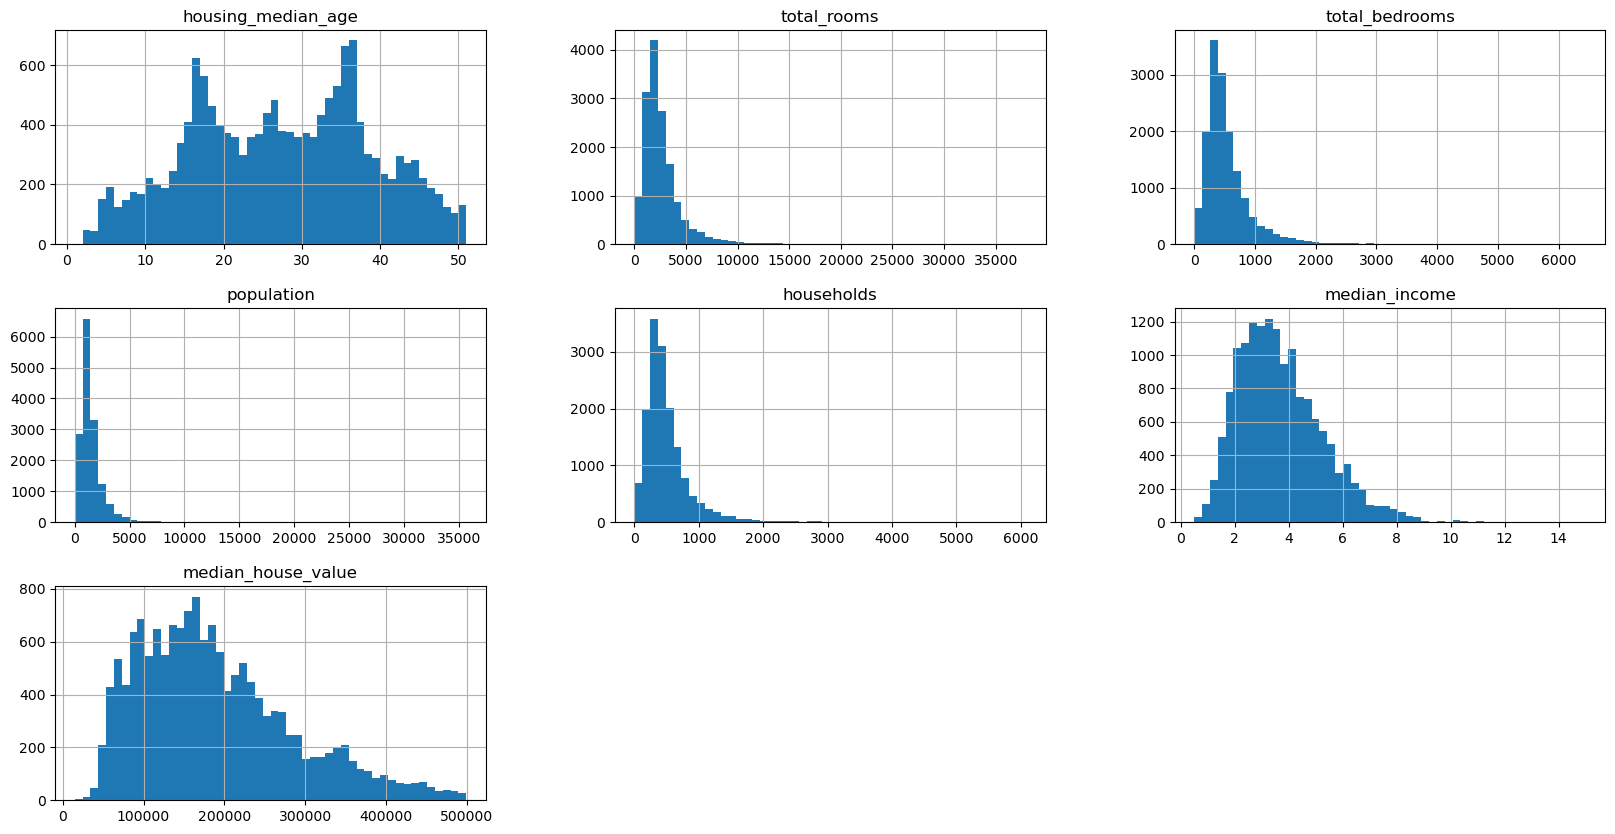

In [5]:
# Plot histogram
_ = df.hist(bins=50 , figsize=(20, 10))

## Correlation analysis

It is always useful to compute correlation coeffcients (e.g.Pearson's r) between the labels (i.e. `median_house_value`) and features.

In [6]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display just house value correlations
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.668566
total_rooms           0.152923
households            0.098525
total_bedrooms        0.079023
population            0.020930
housing_median_age    0.014355
Name: median_house_value, dtype: float64

## Warning about correlation coefficients

* Just remember that correlation coefficients only measure linear correlations ("if `x` goes up, then `y` generally goes up/down").


* They may completely miss nonlinear relationships (e.g., "if `x` is close to zero then `y` generally goes up").


```{image} images/correlations.png
:width: 600px
:align: center
```

## Feature scaling

* Machine Learning algorithms don’t perform well when the input numerical attributes have very **different scales**.


* We often **scale** (or normalize) our features before training the model (e.g. min-max scaling or standardization).


* **Min-max method** scales values so that they end up ranging from 0 to 1


* **Standardization** scales values so that the they have mean of 0 and unit variance.


```{image} images/scaling.png
:width: 800px
:align: center
```

In [7]:
# Import library
from sklearn.preprocessing import StandardScaler

# Define feature list
feature_list =  ['housing_median_age', 'total_rooms', 'total_bedrooms', 
                 'population', 'households', 'median_income']

# Define features and labels 
X = df[feature_list]
y = df['median_house_value']

In [8]:
# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=feature_list)
df_scaled

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.107070,-0.347616,-0.600944,-0.651285,-0.576813,1.620348
1,2.107070,-0.477475,-0.408346,-0.735123,-0.531037,-0.322119
2,2.107070,-0.119352,-0.276081,-0.322709,-0.187718,0.195192
3,2.107070,-0.528700,-0.712325,-0.753753,-0.711598,0.427369
4,2.107070,-0.125643,-0.078842,-0.267664,0.008101,0.091628
...,...,...,...,...,...,...
15262,-2.181428,-0.563748,-0.693762,-0.673303,-0.810779,0.242375
15263,-2.181428,0.618462,0.429337,0.215039,0.364136,0.324757
15264,-2.181428,-1.160470,-1.234427,-1.224600,-1.258365,1.037716
15265,-2.268948,-0.277070,-0.480280,-0.511555,-0.617503,0.990913


## Split data in training and testing subsets

If we want to properly evaluate our machine learning model, we should not use **all** the data for training. Instead, we train the model on a **subset of the data**, retaining another subset (that the model has not "seen") to **evaluate** the model. 

In [9]:
from sklearn.model_selection import train_test_split

# Split data 
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

## Multiple linear regression

We will first experiment with a very simple supervised algorithm that fits a linear model to our data using a least squares approach. 

In [10]:
from sklearn.linear_model import LinearRegression

# Define model
lin_reg = LinearRegression()

# Fit model to data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error

# Predict test labels
predictions = lin_reg.predict(X_test)

# Compute mean-squared-error
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(64374.61617631896)

(0.0, 500000.0)

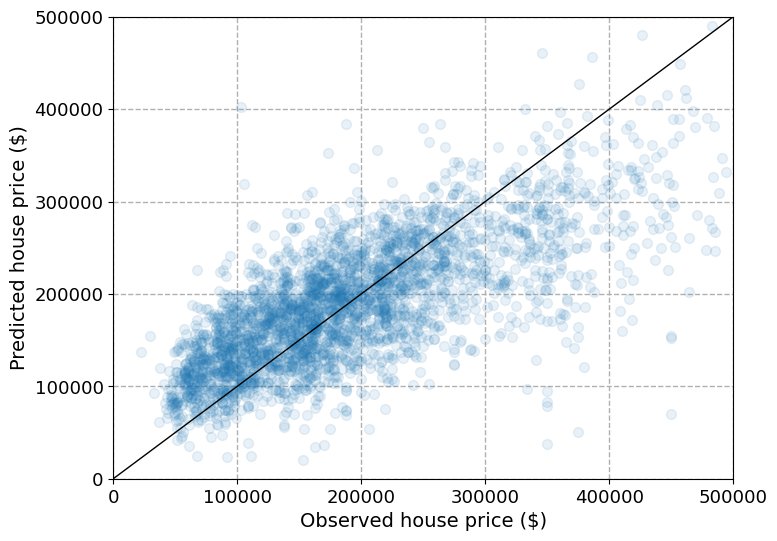

In [12]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

## Decision Tree

Another machine learning algorithm that predicts a target variable using multiple regression trees

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Define model
tree_reg = DecisionTreeRegressor()

# Fit model
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
# Predict test labels
predictions = tree_reg.predict(X_test)

# Compute mean-squared-error
tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(82931.82134037587)

(0.0, 500000.0)

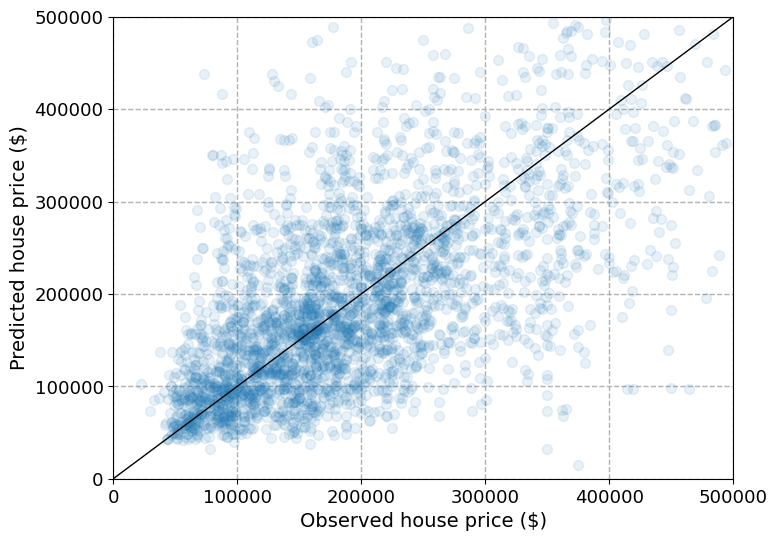

In [15]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

## RandomForests

A popular **ensemble algorithm** that fits a number of **decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [17]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(60105.31819120503)

(0.0, 500000.0)

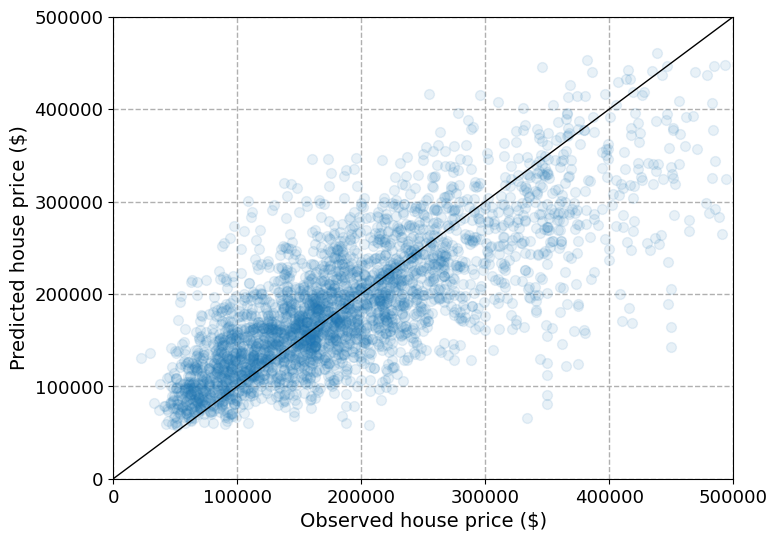

In [18]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

## Feature engineering

Generating **new features** that have predictive power is one of the most important aspects of machine learning. Until now, we just used the default variables for predicting house prices but there are likely other factors that may be useful.

For example, we have **geolocation data**, which could be very useful. In the next part of this demo, we will engineer some new features to improve the accuracy of our house price prediction model.

As a recap, these were the mean-sqaured-errors from the three models:

* Multiple linear regression: \$64,375


* Decision Tree: \$82,989


* RandomForests: \$60,158

In [19]:
# Import package
import geopandas as gpd

# Read datasets
df = pd.read_csv('data/california_house_prices_w_geometry.csv')
coast = gpd.read_file('data/california_coastline.shp')

In [20]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')
coast_utm = coast.to_crs('EPSG:32610')

In [21]:
# Compute distance to coast
distance_to_coast = []
for i in range(gdf_utm.shape[0]):
    distance_to_coast.append(coast_utm.distance(gdf_utm['geometry'].iloc[i]).min())
    
# Add to DataFrame
gdf_utm['distance_to_coast'] = distance_to_coast

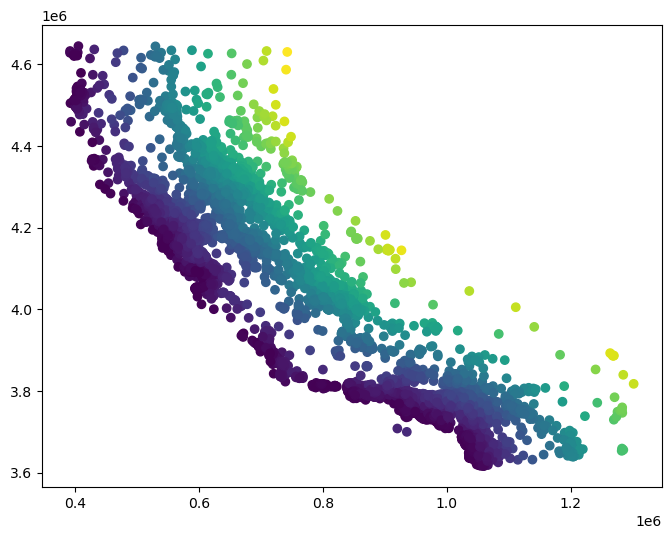

In [22]:
# Quickly check that it worked!
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(gdf_utm['geometry'].x, gdf_utm['geometry'].y, c=gdf_utm['distance_to_coast'])

## Correlation matrix

We will perform another correlation matrix to see if `distance_to_coast` is useful predictor of `median_house_value`.

In [23]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["median_house_value"].sort_values(ascending= False)

TypeError: float() argument must be a string or a real number, not 'Point'

It is the second most correlated variable with `median_house_value`, excellent!

There are still some features that could be improved. For example, `total_rooms` and `total_bedrooms` does not mean much because it just depends on the number of house in the block group. A more useful metric would be **rooms per house** or **bedrooms per house**. 

We can add those columns pretty simply

In [59]:
# Rooms per house
gdf_utm['rooms_per_house'] = gdf_utm['total_rooms'] / gdf_utm['households']

# Bedrooms per house
gdf_utm['bedrooms_per_room'] = gdf_utm['total_bedrooms'] / gdf_utm['total_rooms']

In [60]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.668566
total_rooms           0.152923
rooms_per_house       0.113277
households            0.098525
total_bedrooms        0.079023
population            0.020930
housing_median_age    0.014355
longitude            -0.020092
latitude             -0.173908
bedrooms_per_room    -0.233964
distance_to_coast    -0.505078
Name: median_house_value, dtype: float64

The new `bedrooms_per_room` attribute is more correlated with `median_house_value` than the `total_rooms` or `total_bedrooms`. Apparently houses with a lower bedroom/room ratio tend to be more expensive. 

The `rooms_per_house` is surprisingly not that well correlated with `median_house_value`. Location is clearly the most important thing in the California housing market!

## Fit a model to data

In [61]:
# Define feature list
feature_list =  ['median_income', 'distance_to_coast', 'bedrooms_per_room', 
                 'total_rooms', 'rooms_per_house', 'total_bedrooms', 'households']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['median_house_value']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [62]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

## Evaluate model

In [64]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

55770.43288157548

So we improved our model by \$4,388 (\$60,158 to \$55,770). This might not sound like much but could make a big difference to someone and might the difference between winning a [Kaggle](https://www.kaggle.com/) competition or not.